## Data Analysis of Wine Quality Factors Using Linear Regression
- Kim Damalas, 24 Jan 2021; seattle-401pyn2
- From Kaggle [wine quality factors](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)

In [40]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [41]:
# read in data, create DataFrame = dfw
dfw = pd.read_csv("./winequality-red.csv")

In [49]:
#df = pd.DataFrame(np.random.randn(100, 3))

from scipy import stats
dfw2 = dfw[(np.abs(stats.zscore(dfw)) < 3).all(axis=1)]

In [50]:
# show first 5 in dataset
dfw2.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [51]:
# show dataset descriptive stats
print(dfw2.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1451.000000       1451.000000  1451.000000     1451.000000   
mean        8.310062          0.522950     0.265382        2.387285   
std         1.646458          0.168531     0.190934        0.862078   
min         5.000000          0.120000     0.000000        1.200000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.200000          0.630000     0.420000        2.600000   
max        13.500000          1.040000     0.790000        6.700000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1451.000000          1451.000000           1451.000000  1451.000000   
mean      0.081425            15.104755             43.735355     0.996710   
std       0.020966             9.309768             29.441284     0.001716   
min       0.038000             1.000000         

In [52]:
# show dataset information
print(dfw2.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1451 non-null   float64
 1   volatile acidity      1451 non-null   float64
 2   citric acid           1451 non-null   float64
 3   residual sugar        1451 non-null   float64
 4   chlorides             1451 non-null   float64
 5   free sulfur dioxide   1451 non-null   float64
 6   total sulfur dioxide  1451 non-null   float64
 7   density               1451 non-null   float64
 8   pH                    1451 non-null   float64
 9   sulphates             1451 non-null   float64
 10  alcohol               1451 non-null   float64
 11  quality               1451 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 147.4 KB
None


## Hypothesis A:
How does residual sugar correlate to % alcohol of this wine variant?

In [53]:
# split data into train and test

X = dfw2['residual sugar'].values
y = dfw2['alcohol'].values
X, y

(array([1.9, 2.6, 2.3, ..., 2.3, 2. , 3.6]),
 array([ 9.4,  9.8,  9.8, ..., 11. , 10.2, 11. ]))

In [54]:
# reshape the data
X = X.reshape(-1, 1)
X

array([[1.9],
       [2.6],
       [2.3],
       ...,
       [2.3],
       [2. ],
       [3.6]])

In [64]:
# train_test_split setup (70/30)
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = .7, test_size = .3, random_state = 100)

In [65]:
# Print data shapes
print(f'x-train shape{[x_train.shape]}')
print(f'x-test shape{[x_test.shape]}')
print(f'y-train shape{[y_train.shape]}')
print(f'y-test shape{[y_test.shape]}')


x-train shape[(1015, 1)]
x-test shape[(436, 1)]
y-train shape[(1015,)]
y-test shape[(436,)]


In [73]:
# plot training data

#plt.scatter(x_train, y_train, color = 'blue')

#plt.xlabel('Residual Sugar (g/dm^3)')
#plt.ylabel('% Alcohol')
#plt.title('Wine Quality Training Data')



In [66]:
lm = LinearRegression()
lm.fit(x_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs= None, normalize=False)
y_predict = lm.predict(x_test)
print(f'Train Data Accuracy {round(lm.score(x_train, y_train)*100,2)} %')
print(f'Test Data Accuracy {round(lm.score(x_test, y_test)*100,2)} %')

Train Data Accuracy 2.89 %
Test Data Accuracy 2.09 %


Text(0.5, 1.0, 'Wine Quality Training Data')

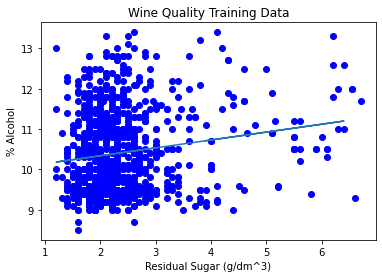

In [67]:
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_test, y_predict)

plt.xlabel('Residual Sugar (g/dm^3)')
plt.ylabel('% Alcohol')
plt.title('Wine Quality Training Data')

## Conclusion A: 
Residual Sugar and Alcohol are not necessarily correlated (at least not linearly coorelated).  This analysis only supports a slight direct correlation.  More modeling is needed to support/refute this hypothesis.  

NOTE: the very low model accuracy indicates linear regression with least squares is not the best model to analyze this relationship

_______________________

## Hypothesis B:
 How does the fixed acidity (tartaric acid) correlate to the citric acid ("freshness") content of this wine variant?

In [124]:
# split data into train and test

X = dfw2['fixed acidity'].values
y = dfw2['citric acid'].values
X, y

(array([7.4, 7.8, 7.8, ..., 6.3, 5.9, 6. ]),
 array([0.  , 0.  , 0.04, ..., 0.13, 0.12, 0.47]))

In [125]:
# reshape the data
X = X.reshape(-1, 1)
X

array([[7.4],
       [7.8],
       [7.8],
       ...,
       [6.3],
       [5.9],
       [6. ]])

In [126]:
# train_test_split setup (80/20)
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = .8, test_size = .2, random_state = 100)

In [127]:
# Print data shapes
print(f'x-train shape{[x_train.shape]}')
print(f'x-test shape{[x_test.shape]}')
print(f'y-train shape{[y_train.shape]}')
print(f'y-test shape{[y_test.shape]}')

x-train shape[(1160, 1)]
x-test shape[(291, 1)]
y-train shape[(1160,)]
y-test shape[(291,)]


In [128]:
lm = LinearRegression()
lm.fit(x_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs= None, normalize=False)
y_predict = lm.predict(x_test)
print(f'Train Data Accuracy {round(lm.score(x_train, y_train)*100,2)} %')
print(f'Test Data Accuracy {round(lm.score(x_test, y_test)*100,2)} %')

Train Data Accuracy 46.91 %
Test Data Accuracy 55.37 %


Text(0.5, 1.0, 'Wine Quality Data')

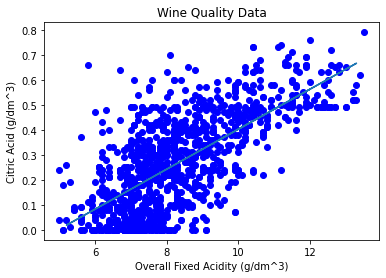

In [129]:
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_test, y_predict)

plt.xlabel('Overall Fixed Acidity (g/dm^3)')
plt.ylabel('Citric Acid (g/dm^3)')
plt.title('Wine Quality Data')

## Conclusion B: 
As the citric acid increase in this wine variant, so does the overall fixed acidity. The two factors have what appears to be a direct, linear correlation.  

NOTE: the near 50% model accuracy indicates linear regression with least squares has a moderate expectation to induce error when analyzing this relationship and suggests needing additional analysis is needed to fully support the hypothesis

______________________

In [ ]:
## Hypothesis B:
 How does the fixed acidity (tartaric acid) correlate to the citric acid ("freshness") content of this wine variant?